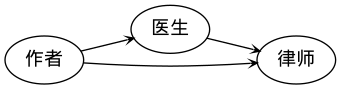

In [5]:
from graphviz import Digraph
dot = Digraph(comment='这是一个有向图')
dot.graph_attr['rankdir'] = 'LR'
dot.edge_attr.update(arrowhead='vee', arrowsize='0.5')
dot.node('A', '作者')
dot.node('B', '医生')
dot.node('C', '律师')
dot.edges(['AB', 'AC'])
dot.edge('B', 'C')
dot.format = 'png'
from IPython.display import display, Image
Image(dot.render('test.gv'))